In [102]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

In [103]:
# load the data
(X_train, _), (X_test, _) = mnist.load_data()

# normalize the input data
X_train = X_train/255
X_test = X_test/255

# rotate input images and set as target output images
y_train = np.rot90(X_train, 2, axes=(1,2))
y_test = np.rot90(X_test, 2, axes=(1,2))

img_row, img_col = X_train.shape[1], X_train.shape[2]

# reshape images to one dimension
X_train = X_train.reshape(X_train.shape[0], img_row*img_col)
X_test = X_test.reshape(X_test.shape[0], img_row*img_col)
y_train = y_train.reshape(y_train.shape[0], img_row*img_col)
y_test = y_test.reshape(y_test.shape[0], img_row*img_col)

print("X_train.shape == " + str(X_train.shape))
print("y_train.shape == " + str(y_train.shape))
print("X_test.shape == " + str(X_test.shape))
print("y_test.shape == " + str(y_test.shape))

X_train.shape == (60000, 784)
y_train.shape == (60000, 784)
X_test.shape == (10000, 784)
y_test.shape == (10000, 784)


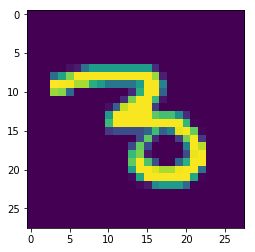

In [104]:
# plot sample of input image
plt.imshow(X_train[30].reshape(img_row, img_col))
plt.show()

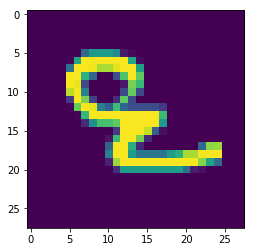

In [105]:
# plot associated output image
plt.imshow(y_train[30].reshape(img_row, img_col))
plt.show()

In [106]:
# build the model
model = Sequential()
model.add(Dense(784, activation='elu', input_shape=(img_row*img_col,)))

In [107]:
# train the model
model.compile(optimizer=Adam(lr=0.001), loss='mse')
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0084 - val_loss: 0.0014
Epoch 2/10
60000/60000 [==============================] - 24s 402us/step - loss: 6.6280e-04 - val_loss: 2.3826e-04
Epoch 3/10
60000/60000 [==============================] - 24s 401us/step - loss: 1.2971e-04 - val_loss: 6.1768e-05
Epoch 4/10
60000/60000 [==============================] - 24s 401us/step - loss: 8.1149e-05 - val_loss: 8.7919e-05
Epoch 5/10
60000/60000 [==============================] - 24s 402us/step - loss: 9.0916e-05 - val_loss: 5.5878e-05
Epoch 6/10
60000/60000 [==============================] - 23s 388us/step - loss: 8.5832e-05 - val_loss: 9.1896e-05
Epoch 7/10
60000/60000 [==============================] - 24s 401us/step - loss: 9.1267e-05 - val_loss: 1.9581e-04
Epoch 8/10
60000/60000 [==============================] - 24s 404us/step - loss: 8.4583e-05 - val_loss: 1.0163e-04
Epoch 9/10
60000/60000 [==============

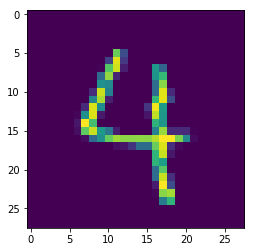

In [108]:
# plot sample test image
plt.imshow(X_test[24].reshape(img_row, img_col))
plt.show()

In [109]:
# pass test image through the model to get generated image
result = model.predict(np.array([X_test[24]]))

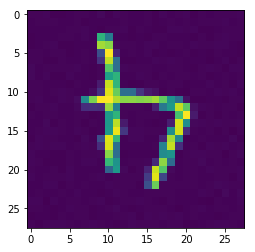

In [110]:
# plot generated image
plt.imshow(result.reshape(img_row, img_col))
plt.show()